In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [3]:
#Load Dataset
df=sns.load_dataset("titanic")

In [4]:
# Pre processing
df=df[["pclass","age","sex","survived"]]
df=df.dropna(subset=["age","sex","survived"])

In [5]:
#Label Encoding Categorical Value
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])

In [6]:
# Features and Target
x=df[["pclass","age","sex"]]
y=df["survived"]

In [8]:
#Train-test split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
#Logistic Regression
model=LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [10]:
#Predictions
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)[:,1]

In [12]:
#Evaluation
print("Accuracy",  accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy 0.7482517482517482
Confusion Matrix:
 [[68 19]
 [17 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        87
           1       0.67      0.70      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



In [13]:
#ROC Curve
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)

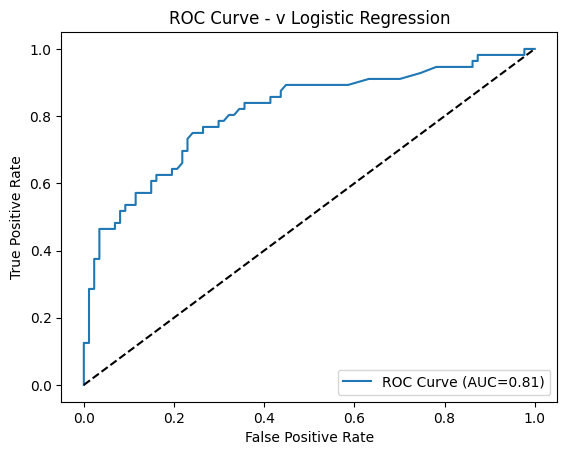

In [14]:
plt.plot(fpr,tpr,label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - v Logistic Regression")
plt.legend(loc="lower right")
plt.show()